<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Text Classification Using BernoullinB And Tfidf Vectorizer

### Text Classification using the BernoulliNB algorithm along with the Text Feature technique TfidfVectorizer from Scikit-learn in python.

## Required Packages

In [ ]:
!pip install nltk
!pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from imblearn.over_sampling import RandomOverSampler
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

## Initialization

Filepath of CSV file

In [7]:
filepath = ""

Target variable for prediction

In [20]:
target = ''

Text column containing all text data

In [21]:
text = ''

## Data Fetching


Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [10]:
df = pd.read_csv(filepath)

In [18]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data cleaning and preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes and we also apply some preprocessing techniques which are specific to text data. 

In [19]:
def data_preprocess(df, target):
    df = df.dropna(axis=0, how = 'any')
    df[target] = LabelEncoder().fit_transform(df[target]) 
    corpus = []
    ps = PorterStemmer()
    for i in range(len(df)) :
        words = re.sub('[^a-zA-Z]',' ',df[text][i])
        words = words.lower()
        words = words.split()
        words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
        words = " ".join(words)
        corpus.append(words)
    return df, corpus

In [22]:
df,corpus = data_preprocess(df, target)

## Feature Transformation

TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

For More Info: [API](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [23]:
tfidf = TfidfVectorizer(max_features=2500)

## Feature Selection

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [24]:
X = tfidf.fit_transform(corpus).toarray()
y = df[target]

## Distribution of target variable

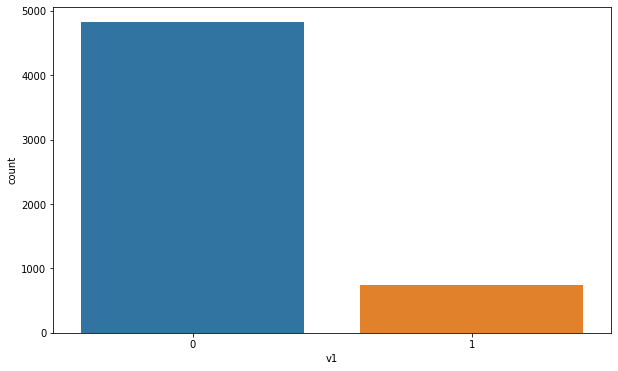

In [25]:
plt.figure(figsize = (10,6))
sns.countplot(y)

## Data Splitting

Since we are using a univariate dataset, we can directly split our data into training and testing subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [27]:
X_train,y_train = RandomOverSampler(random_state=123).fit_resample(X_train, y_train)

## Model

<code>Bernoulli Naive Bayes Classifier</code> is used for discrete data and it works on Bernoulli distribution. The main feature of Bernoulli Naive Bayes is that it accepts features only as binary values like true or false, yes or no, success or failure, 0 or 1 and so on. So when the feature values are **<code>binary</code>** we know that we have to use Bernoulli Naive Bayes classifier.

#### Model Tuning Parameters

    1. alpha : float, default=1.0
> Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

    2. binarize : float or None, default=0.0
> Threshold for binarizing (mapping to booleans) of sample features. If None, input is presumed to already consist of binary vectors.

    3. fit_prior : bool, default=True
> Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

    4. class_prior : array-like of shape (n_classes,), default=None
> Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

For More Info : [API](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)

In [28]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

## Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [29]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 98.74 %



## Confusion Matrix

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

where:

- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- f1-score:- percent of positive predictions were correct
- support:- Support is the number of actual occurrences of the class in the specified dataset.

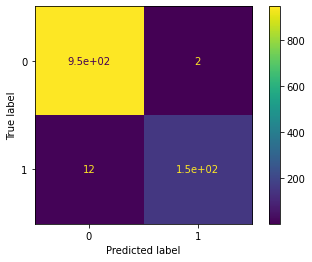

In [30]:
plot_confusion_matrix(model,X_test,y_test)

## Classification Report 

A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

where:

- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- f1-score:- percent of positive predictions were correct
- support:- Support is the number of actual occurrences of the class in the specified dataset.

In [31]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       0.99      0.93      0.96       166

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



#### Creator: Vamsi Mukkamala , Github: [Profile](https://github.com/vmc99)